In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df_waw_listings = pd.read_csv('C:/Users/helme/Documents/Thesis/waw_listings.csv')

In [6]:
df_waw_average_score = pd.read_csv("C:/Users/helme/Documents/Thesis/reviews_and_avg_score.csv")

In [7]:
# Merge listings and reviews on listing_id
df_merged = pd.merge(df_waw_average_score, df_waw_listings, left_on='listing_id', right_on='id', how='inner')

In [8]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3985 entries, 0 to 3984
Data columns (total 90 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   listing_id                                    3985 non-null   int64  
 1   bert_score                                    3985 non-null   float64
 2   roberta_score                                 3985 non-null   float64
 3   id                                            3985 non-null   int64  
 4   listing_url                                   3985 non-null   object 
 5   scrape_id                                     3985 non-null   int64  
 6   last_searched                                 3985 non-null   object 
 7   last_scraped                                  3985 non-null   object 
 8   source                                        3985 non-null   object 
 9   name                                          3985 non-null   o

In [141]:
reviews_per_county = (
    df_merged.groupby('County')
    .size()
    .reset_index(name="n_reviews")
    .sort_values("n_reviews", ascending=False)
)

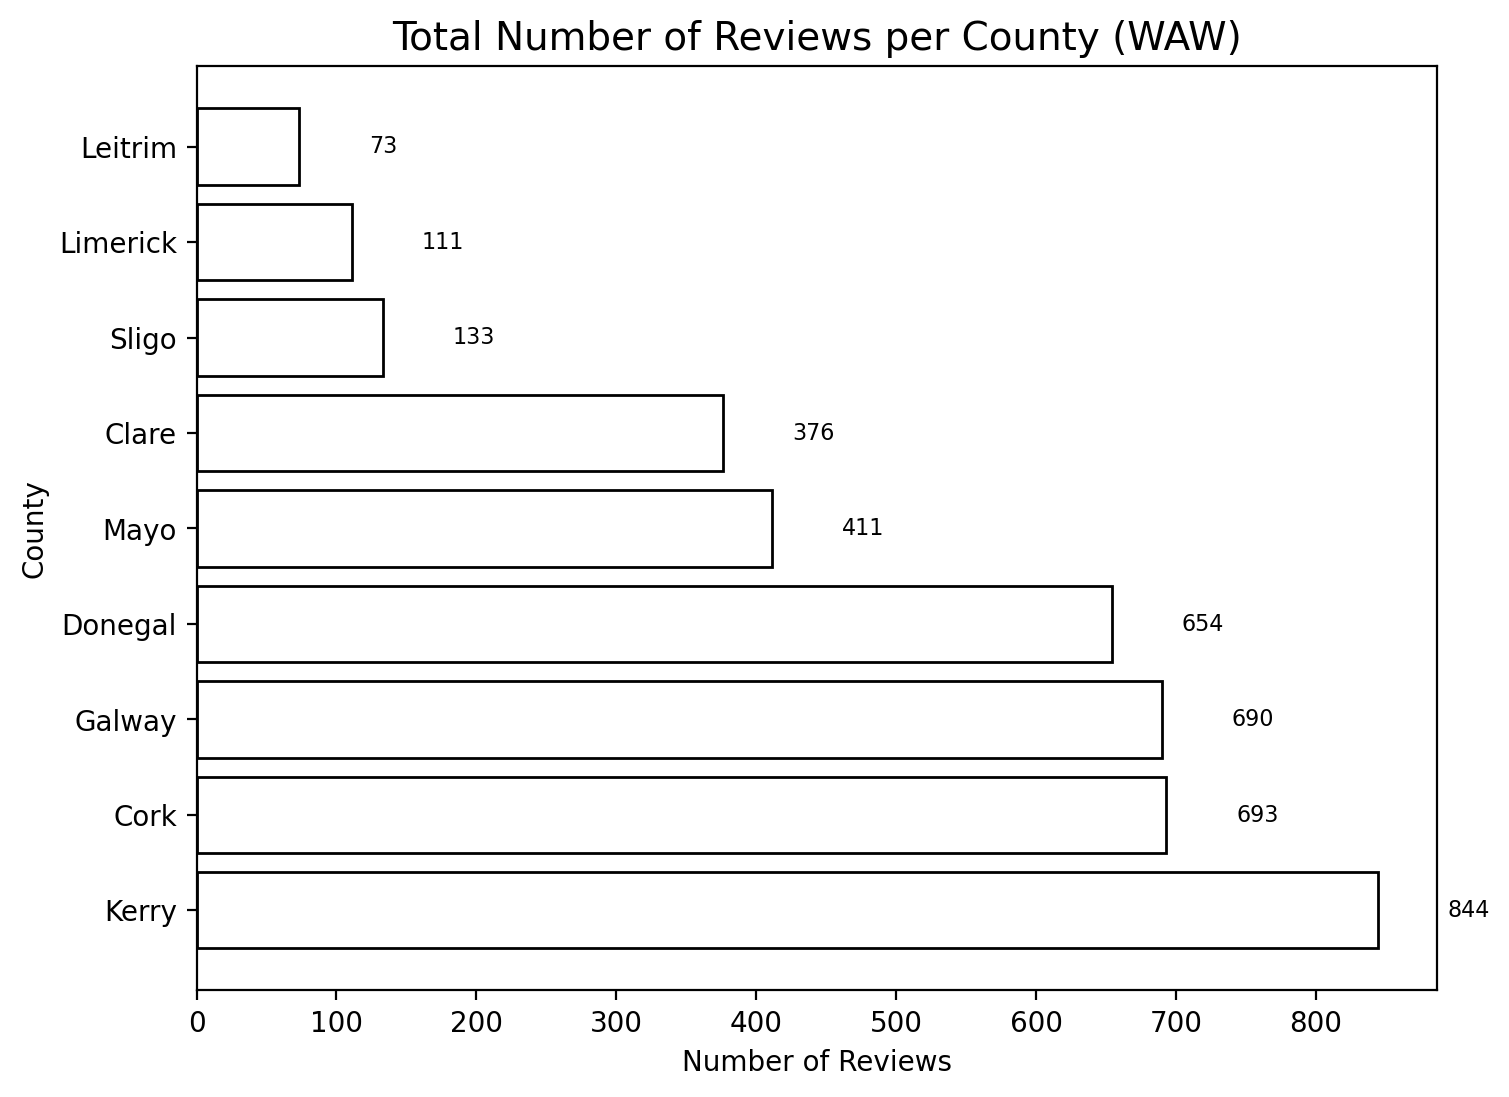

<Figure size 640x480 with 0 Axes>

In [142]:
plt.figure(figsize=(8,6), dpi=200)

bars = plt.barh(
    reviews_per_county['County'],
    reviews_per_county["n_reviews"],
    color="white",
    edgecolor="black",
    height=0.8 
)

plt.title("Total Number of Reviews per County (WAW)", fontsize=14)
plt.xlabel("Number of Reviews")
plt.ylabel("County")

# Add values at the end of each bar
for bar in bars:
    plt.text(bar.get_width() + 50,  
             bar.get_y() + bar.get_height()/2,
             f"{bar.get_width():,}", 
             va="center", fontsize=8)

plt.savefig("reviews_per_county_horizontal_slim.png", dpi=300)
plt.show()
plt.tight_layout()

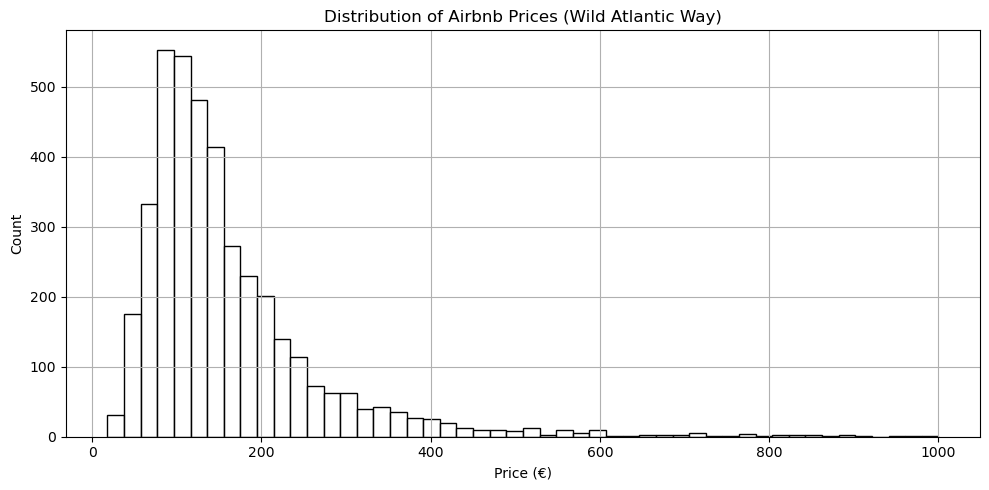

In [106]:
# Price Distribution
plt.figure(figsize=(10,5))
sns.histplot(df_merged['price'], bins=50, color = 'white')
plt.title('Distribution of Airbnb Prices (Wild Atlantic Way)')
plt.xlabel('Price (€)')
plt.grid(True)
plt.tight_layout()
plt.savefig("price_distribution.png", dpi=300)
plt.show()

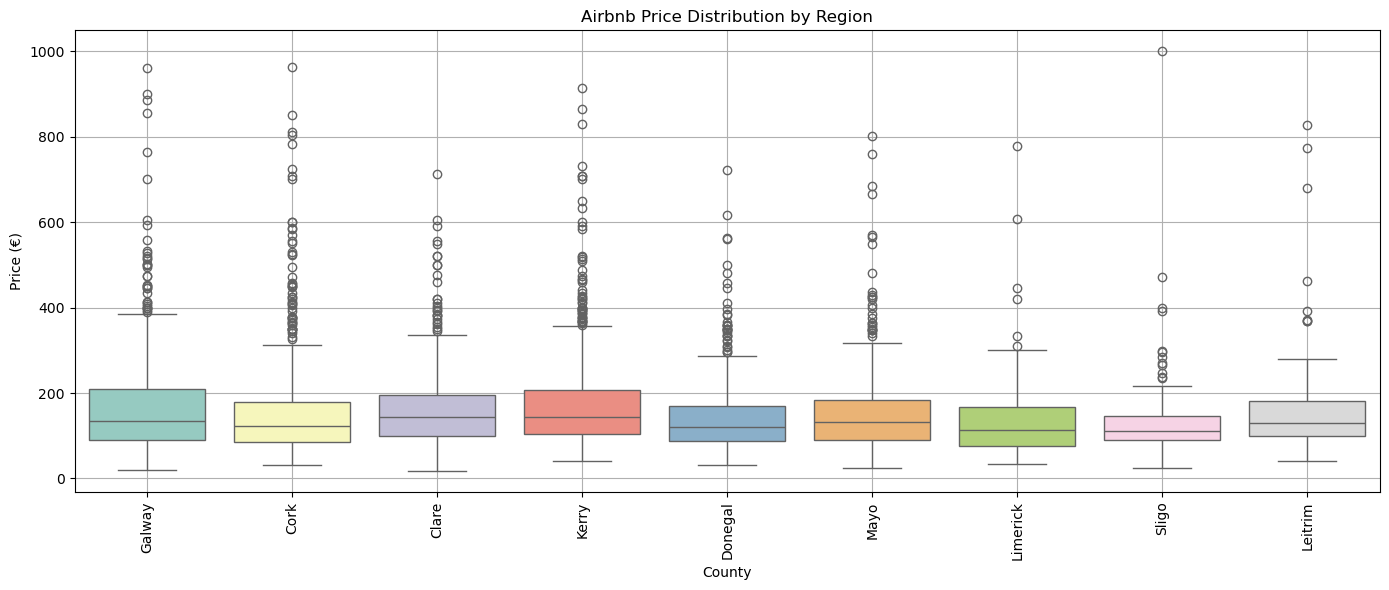

In [10]:
# Boxplot: Price by Region Name
plt.figure(figsize=(14,6))
sns.boxplot(data=df_merged, x='County', y='price', hue ='County', legend=False, palette='Set3')
plt.xticks(rotation=90)
plt.title('Airbnb Price Distribution by Region')
plt.ylabel('Price (€)')
plt.grid(True)
plt.tight_layout()
plt.show()

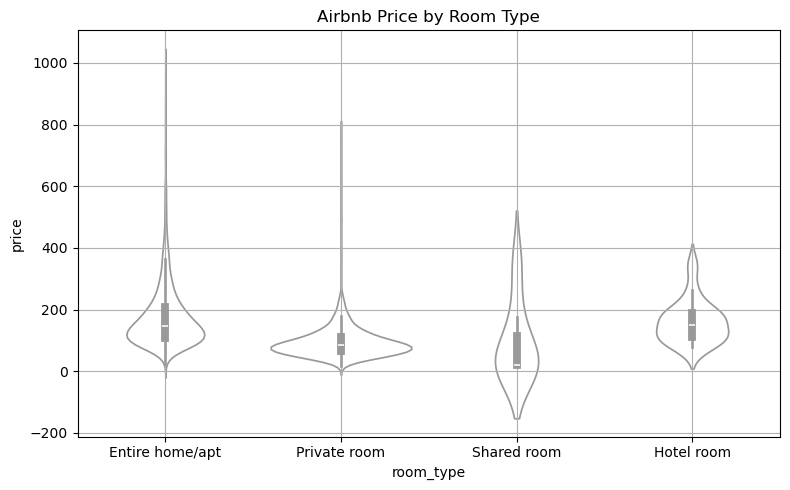

In [107]:
# Violin Plot: Price by Room Type
plt.figure(figsize=(8,5))
sns.violinplot(data=df_merged, x='room_type', y='price', color = 'white')
plt.title('Airbnb Price by Room Type')
plt.grid(True)
plt.tight_layout()
plt.savefig("price_by_roomtype.png", dpi=300)
plt.show()

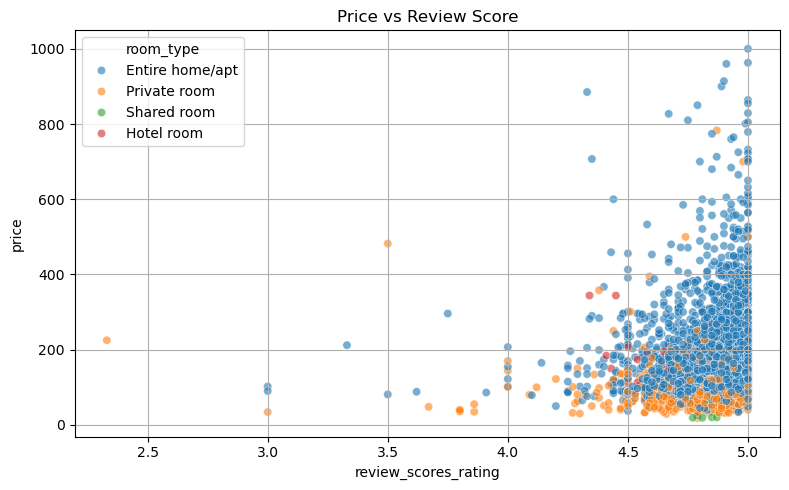

In [12]:
# Scatter Plot: Price vs Review Score
if 'review_scores_rating' in df_merged.columns:
    plt.figure(figsize=(8,5))
    sns.scatterplot(data=df_merged, x='review_scores_rating', y='price', hue='room_type', alpha=0.6)
    plt.title('Price vs Review Score')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


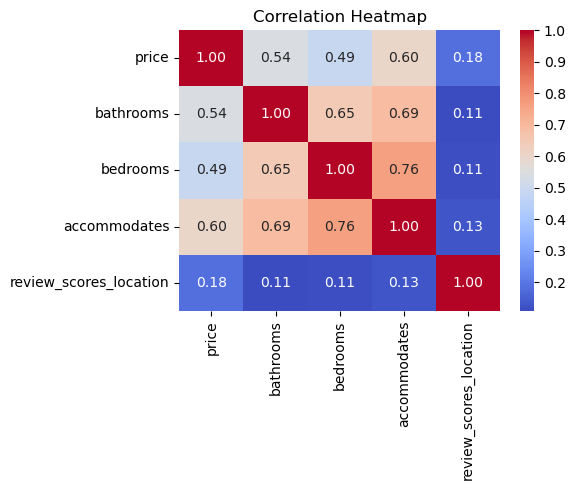

In [108]:
# Correlation Heatmap
corr_cols = ['price', 'bathrooms', 'bedrooms', 'accommodates','review_scores_location',' review_scores_value']
corr_data = df_merged[[col for col in corr_cols if col in df_merged.columns]].dropna()
plt.figure(figsize=(6,5))
sns.heatmap(corr_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig("heatmap.png", dpi=300)
plt.show()

In [91]:
avg_price = df_merged.groupby('County')['price'].mean().sort_values(ascending=False)
print("\nAverage Price per County:\n", avg_price)


Average Price per County:
 County
Leitrim     174.260274
Kerry       171.718009
Galway      169.673913
Clare       169.494681
Mayo        157.180049
Cork        156.118326
Donegal     140.107034
Limerick    139.171171
Sligo       135.398496
Name: price, dtype: float64


In [15]:
# Compute average sentiment per county
avg_sentiment = (
    df_merged.groupby("County")[["bert_score", "roberta_score"]]
    .mean()
    .reset_index()
    .sort_values("bert_score", ascending=False)   # Sort by BERT score (or RoBERTa)
)

print(avg_sentiment)

     County  bert_score  roberta_score
2   Donegal    4.787695       4.834206
7      Mayo    4.776797       4.753613
5   Leitrim    4.772132       4.863340
4     Kerry    4.766631       4.696043
8     Sligo    4.759260       4.793605
0     Clare    4.754398       4.700795
1      Cork    4.752425       4.682107
6  Limerick    4.725253       4.712861
3    Galway    4.689611       4.527674


<Figure size 2000x1200 with 0 Axes>

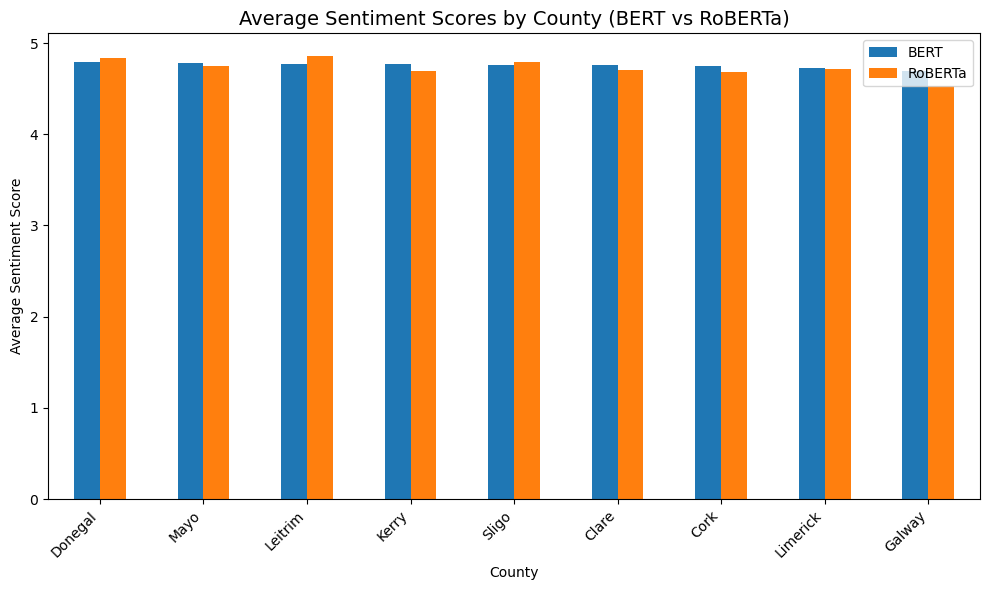

In [17]:
# Plot average scores
plt.figure(figsize=(10,6), dpi=200)
avg_sentiment.plot(x="County", 
                   y=["bert_score", "roberta_score"], 
                   kind="bar", 
                   figsize=(10,6), 
                   rot=45)

plt.title("Average Sentiment Scores by County (BERT vs RoBERTa)", fontsize=14)
plt.ylabel("Average Sentiment Score")
plt.xlabel("County")
plt.xticks(rotation=45, ha="right")
plt.legend(["BERT", "RoBERTa"])
plt.tight_layout()
plt.savefig("avg_sentiment_per_county.png", dpi=300)
plt.show()

In [18]:
# Positive vs Negative classification (using BERT as example)
df_merged["bert_sentiment_label"] = df_merged["bert_score"].apply(lambda x: "Positive" if x >= 3 else "Negative")
df_merged["roberta_sentiment_label"] = df_merged["roberta_score"].apply(lambda x: "Positive" if x >= 3 else "Negative")

# Count distributions
bert_counts = df_merged["bert_sentiment_label"].value_counts()
roberta_counts = df_merged["roberta_sentiment_label"].value_counts()

print("BERT distribution:\n", bert_counts)
print("\nRoBERTa distribution:\n", roberta_counts)

BERT distribution:
 bert_sentiment_label
Positive    3982
Negative       3
Name: count, dtype: int64

RoBERTa distribution:
 roberta_sentiment_label
Positive    3985
Name: count, dtype: int64


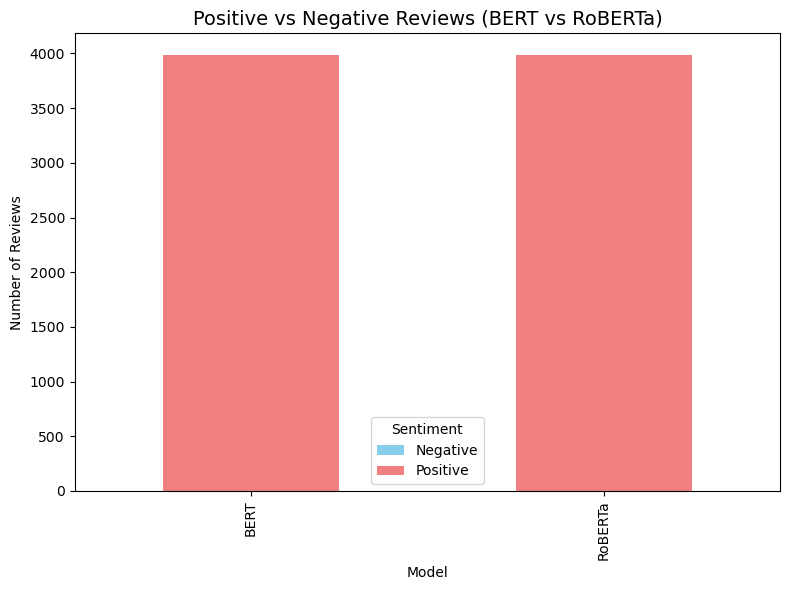

In [19]:
# Combine into DataFrame
sentiment_summary = pd.DataFrame({
    "BERT": bert_counts,
    "RoBERTa": roberta_counts
}).T

# Plot stacked bar
sentiment_summary.plot(kind="bar", stacked=True, color=["skyblue", "lightcoral"], figsize=(8,6))
plt.title("Positive vs Negative Reviews (BERT vs RoBERTa)", fontsize=14)
plt.ylabel("Number of Reviews")
plt.xlabel("Model")
plt.legend(title="Sentiment")
plt.tight_layout()
plt.savefig("sentiment_stacked_bar.png", dpi=300)
plt.show()


In [20]:
model_data = df_merged.copy()

In [21]:
model_data['price'] = pd.to_numeric(model_data['price'], errors='coerce').clip(lower=1)
model_data = model_data.dropna(subset=['price'])
model_data['log_price'] = np.log1p(model_data['price'])  

In [22]:
number_cols = ['listing_id','id','region_id','number_of_reviews_l30d','number_of_reviews_ly','host_id','price','log_price','scrape_id','region_parent_id','host_listings_count','latitude','longitude','bathrooms_text','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm','requires_license','license','number_of_reviews_l30d','estimated_occupancy_l365d','estimated_revenue_l365d','calculated_host_listings_count','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms','number_of_reviews_ltm','region_parent_parent_id','last_searched','last_scraped','host_since','calendar_updated','calendar_last_scraped','first_review','last_review'] 
text_cols = ['name','source','host_location','property_type','region_name','host_verifications','host_neighbourhood','description','host_has_profile_pic','host_identity_verified','neighbourhood','neighborhood_overview','host_name','host_about','amenities','region_parent_name','region_parent_parent_name','listing_url','picture_url','host_url','host_thumbnail_url','host_picture_url']

In [23]:
for col in ['bert_score','roberta_score']:
    if col in model_data.columns:
        model_data[col] = pd.to_numeric(model_data[col], errors='coerce')

In [24]:
numeric_cols = model_data.select_dtypes(include=['number','bool']).columns.tolist()
categorical_cols = model_data.select_dtypes(include=['object','category']).columns.tolist()

In [25]:
numeric_features = [c for c in numeric_cols if c not in number_cols]
categorical_features = [c for c in categorical_cols if c not in (number_cols + text_cols)]

In [26]:
numeric_features

['bert_score',
 'roberta_score',
 'host_total_listings_count',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'minimum_nights',
 'maximum_nights',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'availability_eoy',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'reviews_per_month']

In [27]:
categorical_features

['host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'room_type',
 'has_availability',
 'instant_bookable',
 'County',
 'property_type_grouped',
 'bert_sentiment_label',
 'roberta_sentiment_label']

In [28]:
x_features = model_data[numeric_features + categorical_features].copy()
y_target   = model_data['log_price'] 

In [29]:
print("Inputs (x) shape:", x_features.shape, "| y shape:", y_target.shape)
print("A few numeric features:", [c for c in numeric_features if c in x_features.columns][:10])
print("A few categorical features:", [c for c in categorical_features if c in x_features.columns][:10])

missing_report = x_features.isna().sum().sort_values(ascending=False)
print("\nTop missing-value columns among selected features:")
print(missing_report.head(15))

Inputs (x) shape: (3985, 34) | y shape: (3985,)
A few numeric features: ['bert_score', 'roberta_score', 'host_total_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights', 'availability_30']
A few categorical features: ['host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'room_type', 'has_availability', 'instant_bookable', 'County', 'property_type_grouped', 'bert_sentiment_label']

Top missing-value columns among selected features:
host_response_time             373
host_response_rate             373
host_acceptance_rate           265
host_total_listings_count      156
host_is_superhost               41
beds                             5
has_availability                 5
bathrooms                        1
bedrooms                         1
bert_score                       0
review_scores_value              0
reviews_per_month                0
instant_bookable                 0
room_type                 

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [31]:
# ---Train-test split ---
x_train, x_test, y_train, y_test = train_test_split(x_features, y_target,test_size=0.2, random_state=42)
print("Train shape:", x_train.shape, "| Test shape:", x_test.shape)

Train shape: (3188, 34) | Test shape: (797, 34)


In [32]:
# --- Identify feature types ---
numeric_features = x_train.select_dtypes(include=['number', 'bool']).columns.tolist()
categorical_features = x_train.select_dtypes(include=['object', 'category']).columns.tolist()
print("\nNumeric features (sample):", numeric_features[:10])
print("Categorical features (sample):", categorical_features[:10])


Numeric features (sample): ['bert_score', 'roberta_score', 'host_total_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights', 'availability_30']
Categorical features (sample): ['host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'room_type', 'has_availability', 'instant_bookable', 'County', 'property_type_grouped', 'bert_sentiment_label']


In [33]:
# ---Define preprocessing for each type ---
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),      
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), 
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False)) 
])

In [34]:
# ---Combine transformers into a single preprocessor ---
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)
print("Preprocessing pipeline is ready!")

Preprocessing pipeline is ready!


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [36]:
# ---Build full pipeline (preprocessing + model) ---
linreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),        
    ('model', LinearRegression())
])

In [37]:
# ---Train the model ---
linreg_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['bert_score',
                                                   'roberta_score',
                                                   'host_total_listings_count',
                                                   'accommodates', 'bathrooms',
                                                   'bedrooms', 'beds',
                                                   'minimum_nights',
                                                   'maximum_nights',
                                                   'availability_30',
                                                   'availability_60',
                                                   'availability_9...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['host_response_time',
                                                   'host_response_rate',
                                                   'host_acceptance_rate',
                                                   'host_is_superhost',
                                                   'room_type',
                                                   'has_availability',
                                                   'instant_bookable', 'County',
                                                   'property_type_grouped',
                                                   'bert_sentiment_label',
                                                   'roberta_sentiment_label'])])),
                ('model', LinearRegression())])

In [38]:
# ---Predict on test data ---
y_pred = linreg_pipeline.predict(x_test)

In [143]:
# --- Evaluate performance ---
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Baseline Linear Regression Results")
print(f"RMSE: {rmse:.2f} (euros)")
print(f"R²: {r2:.3f}")


Baseline Linear Regression Results
RMSE: 644105745.51 (euros)
R²: -1311889676786268160.000


In [40]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
# Random Forest pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(
        n_estimators=300,      
        random_state=42,
        n_jobs=-1
    ))
])

In [42]:
# Train
rf_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['bert_score',
                                                   'roberta_score',
                                                   'host_total_listings_count',
                                                   'accommodates', 'bathrooms',
                                                   'bedrooms', 'beds',
                                                   'minimum_nights',
                                                   'maximum_nights',
                                                   'availability_30',
                                                   'availability_60',
                                                   'availability_9...
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['host_response_time',
                                                   'host_response_rate',
                                                   'host_acceptance_rate',
                                                   'host_is_superhost',
                                                   'room_type',
                                                   'has_availability',
                                                   'instant_bookable', 'County',
                                                   'property_type_grouped',
                                                   'bert_sentiment_label',
                                                   'roberta_sentiment_label'])])),
                ('model',
                 RandomForestRegressor(n_estimators=300, n_jobs=-1,
                                       random_state=42))])

In [43]:
# Predict
y_pred_rf = rf_pipeline.predict(x_test)

In [88]:
# Evaluate
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Results")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R²: {r2_rf:.3f}")


Random Forest Results
RMSE: 0.33
R²: 0.655


In [89]:
# RMSE in log scale
rmse_log = rmse_rf  

# Convert back to euro scale
rmse_euro = np.expm1(rmse_log)   # inverse of log1p

print(f"RMSE (log scale): {rmse_log:.3f}")
print(f"Approx RMSE in €: {rmse_euro:.2f}")


RMSE (log scale): 0.330
Approx RMSE in €: 0.39


In [46]:
# Get feature names after preprocessing
feature_names = rf_pipeline.named_steps['preprocessor'].get_feature_names_out()

In [47]:
# Get importances
importances = rf_pipeline.named_steps['model'].feature_importances_

In [48]:
# Put into dataframe
feat_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

In [49]:
# Show top 20
print(feat_importances)

                                   Feature    Importance
3                        num__accommodates  2.099694e-01
5                            num__bedrooms  1.441549e-01
4                           num__bathrooms  6.741891e-02
1                       num__roberta_score  5.692652e-02
20             num__review_scores_location  3.525274e-02
..                                     ...           ...
37             cat__host_response_rate_58%  1.884165e-07
75           cat__host_acceptance_rate_29%  1.708766e-07
68           cat__host_acceptance_rate_19%  1.460514e-07
149                cat__has_availability_t  0.000000e+00
199  cat__roberta_sentiment_label_Positive  0.000000e+00

[200 rows x 2 columns]


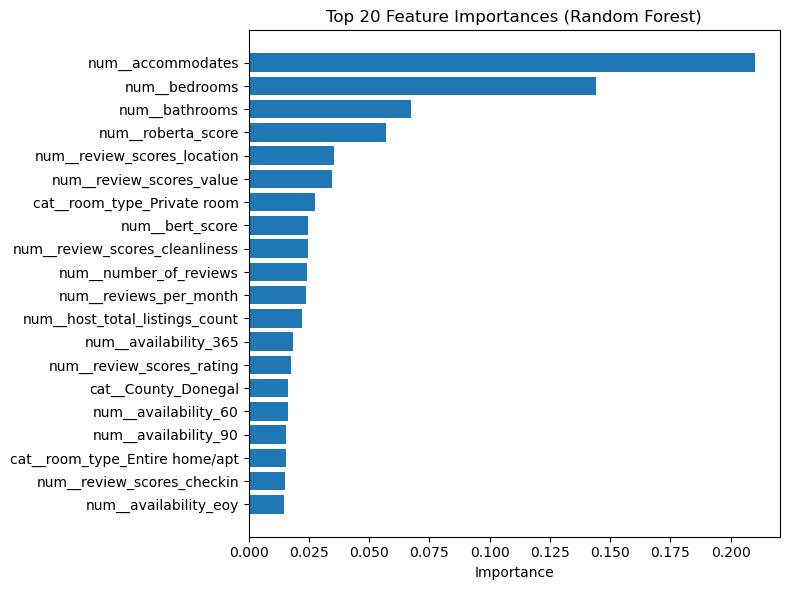

In [51]:
# Plot
plt.figure(figsize=(8,6))
plt.barh(feat_importances['Feature'][:20][::-1], feat_importances['Importance'][:20][::-1])
plt.title("Top 20 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

In [52]:
from collections import defaultdict
from sklearn.inspection import permutation_importance

In [53]:
# ---Run permutation importance ---
result = permutation_importance(
    rf_pipeline, 
    x_test, y_test,
    n_repeats=10, random_state=42, n_jobs=-1
)

In [54]:
# ---Get feature names after preprocessing ---
feature_names = rf_pipeline.named_steps['preprocessor'].get_feature_names_out()

In [55]:
# ---Map back to original column names ---
grouped_importance = defaultdict(list)
for fname, imp in zip(feature_names, result.importances_mean):
    if "County_" in fname:
        grouped_importance["County"].append(imp)
    elif "property_type_grouped_" in fname:
        grouped_importance["Property Type"].append(imp)
    elif "room_type_" in fname:
        grouped_importance["Room Type"].append(imp)
    else:
        base = fname.split("__")[-1]   
        grouped_importance[base].append(imp)

In [56]:
# ---Average importances within each group ---
avg_importance = {k: np.mean(v) for k,v in grouped_importance.items()}

In [57]:
# ---Convert to DataFrame ---
perm_grouped = pd.DataFrame({
    'Feature': list(avg_importance.keys()),
    'Importance': list(avg_importance.values())
}).sort_values(by='Importance', ascending=False)

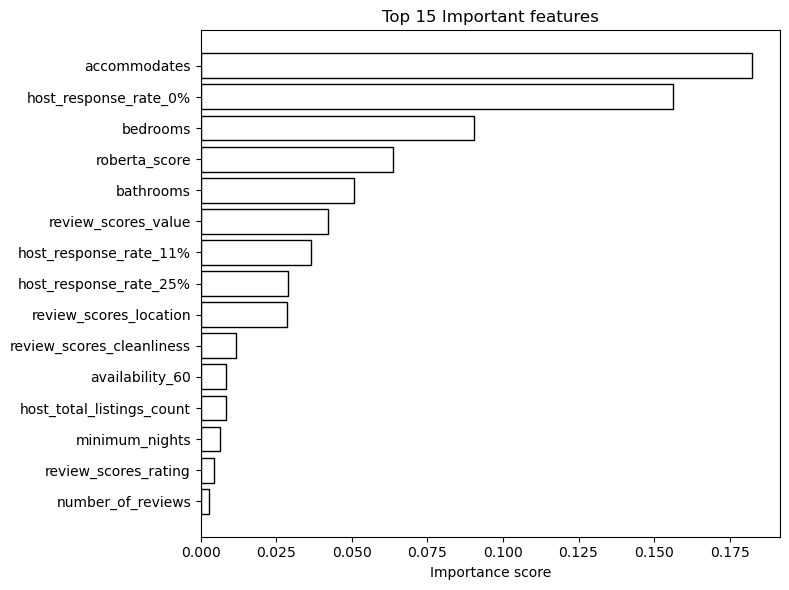

In [129]:
# --- Plot ---
plt.figure(figsize=(8,6))
top15 = perm_grouped.head(15).iloc[::-1]  
plt.barh(top15['Feature'], top15['Importance'], facecolor="white", edgecolor="black")
plt.title("Top 15 Important features")
plt.xlabel("Importance score")
plt.savefig("Feature Importances_bar.png", dpi=300)
plt.tight_layout()
plt.show()


In [60]:
# Save the grouped permutation importance results to CSV
output_path = "feature_importance_grouped.csv"
perm_grouped.to_csv(output_path, index=False)
print(f"Feature importance saved to {output_path}")

Feature importance saved to feature_importance_grouped.csv


In [61]:
perm_grouped.to_csv("C:/Users/helme/Documents/Thesis/feature_importance_grouped.csv", index=False)

In [62]:
!pip install xgboost

In [143]:
!python.exe -m pip install --upgrade pip

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 1.8/1.8 MB 13.7 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 25.1.1
    Uninstalling pip-25.1.1:
      Successfully uninstalled pip-25.1.1


In [63]:
from xgboost import XGBRegressor

In [64]:
# XGBoost pipeline
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(
        n_estimators=500,     
        learning_rate=0.05,   
        max_depth=6,          
        subsample=0.8,        
        colsample_bytree=0.8, 
        random_state=42,
        n_jobs=-1
    ))
])

In [65]:
# Train
xgb_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['bert_score',
                                                   'roberta_score',
                                                   'host_total_listings_count',
                                                   'accommodates', 'bathrooms',
                                                   'bedrooms', 'beds',
                                                   'minimum_nights',
                                                   'maximum_nights',
                                                   'availability_30',
                                                   'availability_60',
                                                   'availability_9...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.05,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=6, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=500, n_jobs=-1,
                              num_parallel_tree=None, ...))])

In [66]:
# Predict
y_pred_xgb = xgb_pipeline.predict(x_test)

In [67]:
# Evaluate
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Results")
print(f"RMSE (log scale): {rmse_xgb:.3f}")
print(f"R²: {r2_xgb:.3f}")
print(f"Approx RMSE in €: {np.expm1(rmse_xgb):.2f}")

XGBoost Results
RMSE (log scale): 0.310
R²: 0.697
Approx RMSE in €: 0.36


In [70]:
!pip install lightgbm

In [72]:
from lightgbm import LGBMRegressor

In [73]:
# LightGBM pipeline
lgbm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LGBMRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=-1,      
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1
    ))
])

In [74]:
# Train
lgbm_pipeline.fit(x_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002478 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2426
[LightGBM] [Info] Number of data points in the train set: 3188, number of used features: 93
[LightGBM] [Info] Start training from score 4.917573


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['bert_score',
                                                   'roberta_score',
                                                   'host_total_listings_count',
                                                   'accommodates', 'bathrooms',
                                                   'bedrooms', 'beds',
                                                   'minimum_nights',
                                                   'maximum_nights',
                                                   'availability_30',
                                                   'availability_60',
                                                   'availability_9...
                                                                                 sparse_output=False))]),
                                                  ['host_response_time',
                                                   'host_response_rate',
                                                   'host_acceptance_rate',
                                                   'host_is_superhost',
                                                   'room_type',
                                                   'has_availability',
                                                   'instant_bookable', 'County',
                                                   'property_type_grouped',
                                                   'bert_sentiment_label',
                                                   'roberta_sentiment_label'])])),
                ('model',
                 LGBMRegressor(colsample_bytree=0.8, learning_rate=0.05,
                               n_estimators=500, n_jobs=-1, random_state=42,
                               subsample=0.8))])

In [75]:
# Predict
y_pred_lgbm = lgbm_pipeline.predict(x_test)

In [76]:
# Evaluate
rmse_lgbm = np.sqrt(mean_squared_error(y_test, y_pred_lgbm))
r2_lgbm = r2_score(y_test, y_pred_lgbm)

print("LightGBM Results")
print(f"RMSE (log scale): {rmse_lgbm:.3f}")
print(f"R²: {r2_lgbm:.3f}")
print(f"Approx RMSE in €: {np.expm1(rmse_lgbm):.2f}")

LightGBM Results
RMSE (log scale): 0.316
R²: 0.684
Approx RMSE in €: 0.37


In [77]:
# --- Define models ---
models = {
    "Random Forest": RandomForestRegressor(
        n_estimators=300, random_state=42, n_jobs=-1
    ),
    "XGBoost": XGBRegressor(
        n_estimators=500, learning_rate=0.05, max_depth=6,
        subsample=0.8, colsample_bytree=0.8, random_state=42, n_jobs=-1
    ),
    "LightGBM": LGBMRegressor(
        n_estimators=500, learning_rate=0.05, subsample=0.8,
        colsample_bytree=0.8, random_state=42, n_jobs=-1
    )
}

# --- Function to train & evaluate a model ---
def evaluate_model(name, model):
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    pipeline.fit(x_train, y_train)
    preds = pipeline.predict(x_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    rmse_euro = np.expm1(rmse)  # convert from log scale to € scale
    
    return {"Model": name, "RMSE (log)": rmse, "R²": r2, "RMSE (€)": rmse_euro}

# --- Run all models ---
results = []
for name, model in models.items():
    results.append(evaluate_model(name, model))

# --- Convert to DataFrame ---
results_df = pd.DataFrame(results).sort_values(by="R²", ascending=False)
print(results_df)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000717 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2426
[LightGBM] [Info] Number of data points in the train set: 3188, number of used features: 93
[LightGBM] [Info] Start training from score 4.917573
           Model  RMSE (log)        R²  RMSE (€)
1        XGBoost    0.309599  0.696903  0.362878
2       LightGBM    0.316101  0.684039  0.371768
0  Random Forest    0.330077  0.655481  0.391075


In [78]:
# ---Pick the best model by R² and refit on the same train/test split ---
best_name = results_df.sort_values("R²", ascending=False).iloc[0]["Model"]
best_model = models[best_name]

best_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', best_model)
])

best_pipeline.fit(x_train, y_train)
y_pred_best = best_pipeline.predict(x_test)

rmse_log = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best  = r2_score(y_test, y_pred_best)
rmse_eur = np.expm1(rmse_log)

print(f"Best model: {best_name}")
print(f"RMSE (log): {rmse_log:.3f} | R²: {r2_best:.3f} | Approx RMSE (€): {rmse_eur:.2f}")

Best model: XGBoost
RMSE (log): 0.310 | R²: 0.697 | Approx RMSE (€): 0.36


In [79]:
# --- Convert predictions back to euros for easy interpretation ---
y_test_eur = np.expm1(y_test)
y_pred_eur = np.expm1(y_pred_best)

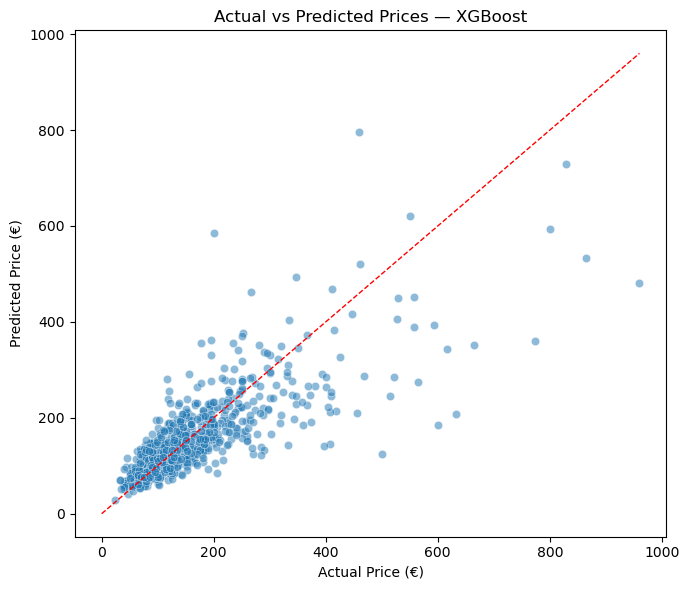

In [134]:
# --- Actual vs Predicted (scatter) ---
plt.figure(figsize=(7,6))
sns.scatterplot(x=y_test_eur, y=y_pred_eur, alpha=0.5)
mx = max(y_test_eur.max(), y_pred_eur.max())
plt.plot([0, mx], [0, mx], 'r--', linewidth=1)
plt.xlabel("Actual Price (€)")
plt.ylabel("Predicted Price (€)")
plt.title(f"Actual vs Predicted Prices — {best_name}")
plt.savefig("scatterplot.png", dpi=300)
plt.tight_layout()
plt.show()

In [81]:
import joblib

In [82]:
final_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(
        n_estimators=500,       
        learning_rate=0.05,     
        max_depth=6,            
        subsample=0.8,          
        colsample_bytree=0.8,   
        random_state=42,
        n_jobs=-1
    ))
])

In [83]:
# --- Train on full dataset ---
final_model.fit(x_features, y_target)

print("Final XGBoost model trained on full dataset!")

# --- Save model for reuse ---
joblib.dump(final_model, "final_airbnb_xgb_model.pkl")
print("Model saved as 'final_airbnb_xgb_model.pkl'")


Final XGBoost model trained on full dataset!
Model saved as 'final_airbnb_xgb_model.pkl'


In [84]:
# --- load model ---
model = joblib.load("final_airbnb_xgb_model.pkl")

## price prediction without sentimental score

In [114]:
# --- dataset without sentiment score ---
df_no_sent = df_waw_listings.copy()

In [115]:
# --- Define target ---
df_no_sent['price'] = pd.to_numeric(df_no_sent['price'], errors='coerce').clip(lower=1)
df_no_sent = df_no_sent.dropna(subset=['price'])
df_no_sent['log_price'] = np.log1p(df_no_sent['price'])
y_target_nosent = df_no_sent['log_price']

In [116]:
number_cols = ['listing_id','id','region_id','number_of_reviews_l30d','number_of_reviews_ly','host_id','price','log_price','scrape_id','region_parent_id','host_listings_count','latitude','longitude','bathrooms_text','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm','requires_license','license','number_of_reviews_l30d','estimated_occupancy_l365d','estimated_revenue_l365d','calculated_host_listings_count','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms','number_of_reviews_ltm','region_parent_parent_id','last_searched','last_scraped','host_since','calendar_updated','calendar_last_scraped','first_review','last_review'] 
text_cols = ['name','source','host_location','property_type','region_name','host_verifications','host_neighbourhood','description','host_has_profile_pic','host_identity_verified','neighbourhood','neighborhood_overview','host_name','host_about','amenities','region_parent_name','region_parent_parent_name','listing_url','picture_url','host_url','host_thumbnail_url','host_picture_url']

In [117]:
x_features_nosent = df_no_sent.drop(columns=number_cols + text_cols, errors='ignore')

In [118]:
x_train_ns, x_test_ns, y_train_ns, y_test_ns = train_test_split(x_features_nosent, y_target_nosent, test_size=0.2, random_state=42)

In [119]:
numeric_features = x_train_ns.select_dtypes(include=['number','bool']).columns.tolist()
categorical_features = x_train_ns.select_dtypes(include=['object','category']).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor_nosent = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [120]:
# --- Train XGBoost model (no sentiment) ---
xgb_pipeline_nosent = Pipeline(steps=[
    ('preprocessor', preprocessor_nosent),
    ('model', XGBRegressor(
        n_estimators=500, learning_rate=0.05, max_depth=6,
        subsample=0.8, colsample_bytree=0.8, random_state=42, n_jobs=-1
    ))
])

xgb_pipeline_nosent.fit(x_train_ns, y_train_ns)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['host_total_listings_count',
                                                   'accommodates', 'bathrooms',
                                                   'bedrooms', 'beds',
                                                   'minimum_nights',
                                                   'maximum_nights',
                                                   'availability_30',
                                                   'availability_60',
                                                   'availability_90',
                                                   'availability_365',
                                                   'number...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.05,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=6, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=500, n_jobs=-1,
                              num_parallel_tree=None, ...))])

In [121]:
# --- Evaluate ---
y_pred_ns = xgb_pipeline_nosent.predict(x_test_ns)

rmse_ns = np.sqrt(mean_squared_error(y_test_ns, y_pred_ns))
r2_ns = r2_score(y_test_ns, y_pred_ns)

print("XGBoost without Sentiment Results")
print(f"RMSE (log): {rmse_ns:.3f}")
print(f"R²: {r2_ns:.3f}")
print(f"Approx RMSE in €: {np.expm1(rmse_ns):.2f}")


XGBoost without Sentiment Results
RMSE (log): 0.330
R²: 0.660
Approx RMSE in €: 0.39


In [122]:
# --- Results with sentiment ---
rmse_with = rmse_xgb       # RMSE (log scale) from sentiment model
r2_with   = r2_xgb         # R² from sentiment model
rmse_eur_with = np.expm1(rmse_with)

# --- Results without sentiment ---
rmse_without = rmse_ns
r2_without   = r2_ns
rmse_eur_without = np.expm1(rmse_without)

# --- comparison table creation ---
comparison_df = pd.DataFrame({
    "Model": ["XGBoost WITH Sentiment", "XGBoost WITHOUT Sentiment"],
    "Rows Used": [len(x_features), len(x_features_nosent)],
    "RMSE (log)": [rmse_with, rmse_without],
    "R²": [r2_with, r2_without],
    "Approx RMSE (€)": [rmse_eur_with, rmse_eur_without]
})

print("Sentiment vs No-Sentiment Comparison")
print(comparison_df)


Sentiment vs No-Sentiment Comparison
                       Model  Rows Used  RMSE (log)        R²  Approx RMSE (€)
0     XGBoost WITH Sentiment       3985    0.309599  0.696903         0.362878
1  XGBoost WITHOUT Sentiment      14592    0.329754  0.660210         0.390627


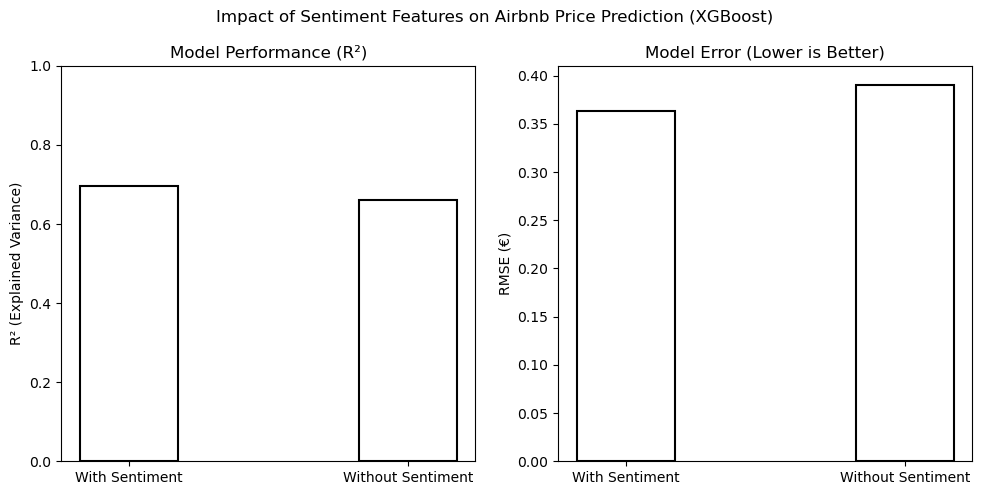

In [127]:
# Labels
labels = ["With Sentiment", "Without Sentiment"]

# Values
r2_values = [r2_with, r2_without]
rmse_values = [rmse_eur_with, rmse_eur_without]

x = np.arange(len(labels))  # label positions
width = 0.35  # bar width

fig, axes = plt.subplots(1, 2, figsize=(10,5))

# ---R² Comparison ---
axes[0].bar(x, r2_values, width, facecolor="white", edgecolor="black", linewidth=1.5)
axes[0].set_xticks(x)
axes[0].set_xticklabels(labels)
axes[0].set_ylabel("R² (Explained Variance)")
axes[0].set_title("Model Performance (R²)")
axes[0].set_ylim(0,1)

# ---RMSE Comparison (Euros) ---
axes[1].bar(x, rmse_values, width, facecolor="white", edgecolor="black", linewidth=1.5)
axes[1].set_xticks(x)
axes[1].set_xticklabels(labels)
axes[1].set_ylabel("RMSE (€)")
axes[1].set_title("Model Error (Lower is Better)")

plt.suptitle("Impact of Sentiment Features on Airbnb Price Prediction (XGBoost)")
plt.tight_layout()
plt.savefig("comparison.png", dpi=300, bbox_inches="tight")
plt.show()